Duchenne Muscular Dystrophy (DMD) is a genetically transmitted disease, passed from a mother to her children. Affected female offspring usually suffer no apparent symptoms, male offspring with the disease die at young age. Although female carriers have no physical symptoms they tend to exhibit elevated levels of certain serum enzymes or proteins. 
The dystrophy dataset contains 209 observations of 75 female DMD carriers and 134 female DMD non-carrier. It includes 6 variables describing age of the female and the serum parameters serum marker creatine kinase (CK), serum marker hemopexin (H), serum marker pyruvate kinase (PK) and serum marker lactate dehydroginase (LD). The serum markers CK and H may be measured rather inexpensive from frozen serum, PK and LD requires fresh serum.

The first two serum markers, creatine kinase and hemopexin (ck,h), are inexpensive to obtain, while the last two, pyruvate kinase and lactate dehydroginase (pk,ld), are more expensive. It is of interest to measure how much pk and ld add toward predicting the carrier status. The importance of age and sample date is also of interest. Percy noted that the water supply for the lab changed during the study.

In [35]:
import pandas as pd
import numpy as np

In [2]:
dystrophy = pd.read_csv('dystrophy.csv')

In [5]:
dystrophy.head()

,OBS,HospID,AGE,M,Y,CK,H,PK,LD,Class
0,1,1007,22,6,79,52.0,83.5,10.9,176.0,normal
1,1,786,32,8,78,20.0,77.0,11.0,200.0,normal
2,1,778,36,7,78,28.0,86.5,13.2,171.0,normal
3,1,1306,22,11,79,30.0,104.0,22.6,230.0,normal
4,1,895,23,1,78,40.0,83.0,15.2,205.0,normal


In [6]:
dystrophy = dystrophy.dropna()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

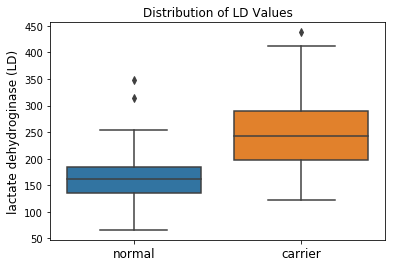

In [14]:
sns.boxplot(data = dystrophy, x = 'Class', y = 'LD')
plt.ylabel('lactate dehydroginase (LD)', fontsize = 12)
plt.xlabel('')
plt.xticks(fontsize = 12)
plt.title('Distribution of LD Values', fontsize = 12);

plt.savefig('LD_box.png')

In [22]:
dystrophy['carrier'] = (dystrophy.Class == 'carrier').astype('int')

In [23]:
dystrophy.head()

,OBS,HospID,AGE,M,Y,CK,H,PK,LD,Class,carrier
0,1,1007,22,6,79,52.0,83.5,10.9,176.0,normal,0
1,1,786,32,8,78,20.0,77.0,11.0,200.0,normal,0
2,1,778,36,7,78,28.0,86.5,13.2,171.0,normal,0
3,1,1306,22,11,79,30.0,104.0,22.6,230.0,normal,0
4,1,895,23,1,78,40.0,83.0,15.2,205.0,normal,0


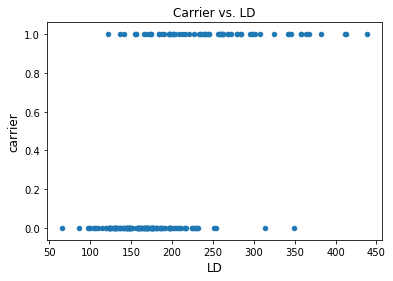

In [28]:
dystrophy.plot(x = 'LD', y = 'carrier', kind = 'scatter')
plt.title('Carrier vs. LD')
plt.ylabel('carrier', fontsize = 12)
plt.xlabel('LD', fontsize = 12);

plt.savefig('scatter_01.png')

In [29]:
from sklearn.linear_model import LinearRegression

In [36]:
lin_reg = LinearRegression()

In [37]:
X = dystrophy[['LD']]
y = dystrophy.carrier

In [38]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
lin_reg.intercept_

-0.4829035086626903

In [40]:
lin_reg.coef_

array([0.00426057])

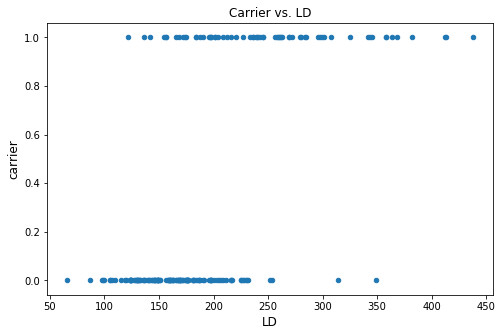

In [50]:
m = lin_reg.coef_[0]
b = lin_reg.intercept_

x = np.linspace(start = X.min(), stop = X.max())
y = m*x + b

fig, ax = plt.subplots(figsize = (8,5))

dystrophy.plot(x = 'LD', y = 'carrier', kind = 'scatter', ax = ax)
plt.plot(x = x, y = y)
plt.title('Carrier vs. LD')
plt.ylabel('carrier', fontsize = 12)
plt.xlabel('LD', fontsize = 12);

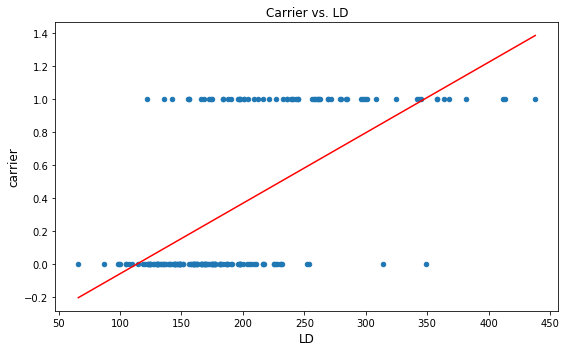

In [69]:
m = lin_reg.coef_[0]
b = lin_reg.intercept_

x = np.linspace(start = X.min(), stop = X.max())
y = m*x + b

fig, ax = plt.subplots(figsize = (8,5))
dystrophy.plot(x = 'LD', y = 'carrier', kind = 'scatter', ax = ax)
plt.plot(x, y, color = 'red')

plt.title('Carrier vs. LD')
plt.ylabel('carrier', fontsize = 12)
plt.xlabel('LD', fontsize = 12);

plt.tight_layout()
plt.savefig('scatter_02.png')

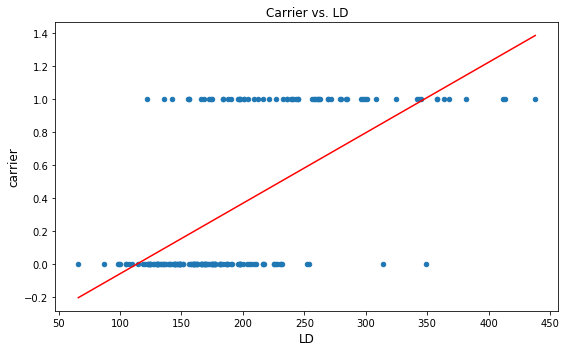

In [55]:
')

In [58]:
x = np.linspace(-5, 5, num = 250)
y = 1 / (1 + np.exp(-x))

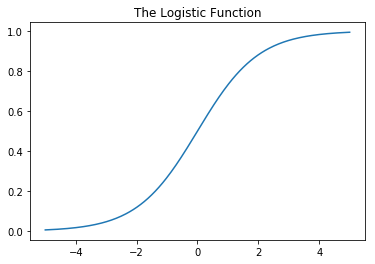

In [61]:
plt.plot(x, y)
plt.title('The Logistic Function');
plt.savefig('logistic.png')

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression()

In [71]:
X = dystrophy[['LD']]
y = dystrophy.carrier

In [72]:
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
lr.coef_[0]

array([0.02904558])

In [74]:
lr.intercept_

array([-6.40684315])

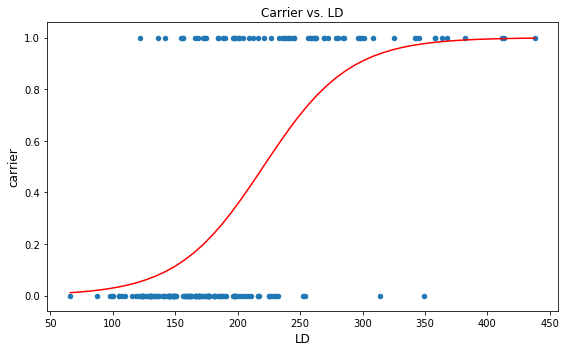

In [75]:
m = lr.coef_[0]
b = lr.intercept_

x = np.linspace(start = X.min(), stop = X.max())
y = 1 / (1 + np.exp(-(m*x + b)))

fig, ax = plt.subplots(figsize = (8,5))
dystrophy.plot(x = 'LD', y = 'carrier', kind = 'scatter', ax = ax)
plt.plot(x, y, color = 'red')

plt.title('Carrier vs. LD')
plt.ylabel('carrier', fontsize = 12)
plt.xlabel('LD', fontsize = 12);

plt.tight_layout()
plt.savefig('scatter_03.png')


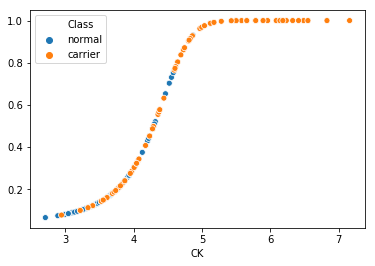

In [41]:
sns.scatterplot(x = np.log(dystrophy.CK), y = lr.predict_proba(X)[:,0], hue = y);

In [43]:
lr.predict_proba(np.array([58]).reshape(1,-1))

array([[0.33304343, 0.66695657]])

In [44]:
lr.predict_proba(np.array([200]).reshape(1,-1))

array([[0.99698034, 0.00301966]])

In [45]:
dystrophy.head()

,OBS,HospID,AGE,M,Y,CK,H,PK,LD,Class
0,1,1007,22,6,79,52.0,83.5,10.9,176.0,normal
1,1,786,32,8,78,20.0,77.0,11.0,200.0,normal
2,1,778,36,7,78,28.0,86.5,13.2,171.0,normal
3,1,1306,22,11,79,30.0,104.0,22.6,230.0,normal
4,1,895,23,1,78,40.0,83.0,15.2,205.0,normal


In [49]:
dystrophy.groupby('Class').PK.mean()

Class
carrier    23.932836
normal     12.145522
Name: PK, dtype: float64

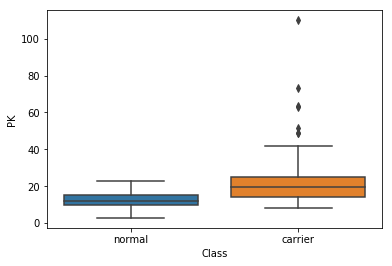

In [50]:
sns.boxplot(data = dystrophy, x = 'Class', y = 'PK')

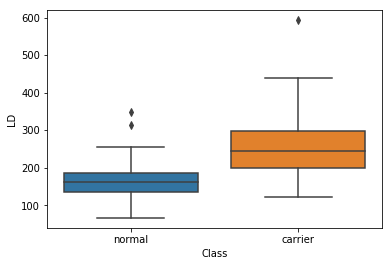

In [52]:
sns.boxplot(data = dystrophy, x = 'Class', y = 'LD');

In [57]:
dystrophy = dystrophy.dropna()

In [60]:
X = dystrophy[['LD']]
y = dystrophy.Class

In [61]:
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
lr.coef_[0]

array([-0.02904558])

In [63]:
dystrophy.shape

(194, 10)